In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import IFrame

%matplotlib inline

## Enunciado

In [3]:
IFrame("./Exercício 8 - Cosmologia.pdf", width=800, height=600)

## EDOs

Começamos convertendo as derivadas no tempo comóvel $\eta$ para $a$, lembrando que

\begin{equation*}
d\eta = \frac{1}{a} dt  \Rightarrow \frac{dt}{d\eta} = a
\end{equation*}

Temos

\begin{align*}
  \frac{d}{d\eta} &= \frac{dt}{d\eta}\frac{da}{dt}\frac{d}{da} \\
  &= a \dot{a} \frac{d}{da} \\
  &= a^2 H(a) \frac{d}{da}
\end{align*}

O sistema de equações então se torna

\begin{align*}
  \frac{d\theta_m}{da} &= -\frac{1}{2H} \rho(k, a) - \frac{1}{a} \theta_m\\
  \frac{d\delta_m}{da} &= -\frac{1}{a^2 H} \theta_m \\
  \frac{d\theta_R}{da} &= -\frac{1}{2H} \rho(k, a) + \frac{k^2}{4a^2 H(a)} \delta_R \\
  \frac{d\delta_R}{da} &= -\frac{4}{3a^2 H} \theta_R
\end{align*}

onde definimos

\begin{equation*}
  \rho(k,a) = \rho_m(a) \delta_m + \rho_R(a) \delta_R
\end{equation*}

Assumindo um modelo $\Lambda$CDM chato, temos ainda as relações

\begin{align*}
  H(a) &= H_0 \left( \Omega_{m0} a^{-3} + \Omega_{R0} a^{-4} + (1 - \Omega_{m0} - \Omega_{R0})\right)^{1/2} \\
  H_0 &= \frac{10^5 m/s}{c_{m/s}} h \text{ Mpc}^{-1}
\end{align*}
e,
\begin{align*}
  \rho(k, a) &= \rho_{c0} \left( \Omega_{m0} a^{-3} \delta_m + \Omega_{R0} a^{-4} \delta_R \right) \\
  &= 3 H_0^2 \left(\Omega_{m0} a^{-3} \delta_m + \Omega_{R0} a^{-4} \delta_R \right) 
\end{align*}

Todas as grandezas são medidas em potências de Mpc (e $c = 8\pi G = 1$).

Definindo o vetor $y = [\theta_m, \delta_m, \theta_R, \delta_R]$, temos então um sistema da forma

\begin{equation*}
  \frac{dy}{da} = f(y, a, k, h, \Omega_{m0}, \Omega_{R0})
\end{equation*}

## Raio do horizonte comóvel

O raio do horizonte comóvel associado ao redshift $a$ é dado por

\begin{align*}
  \chi_{com} = \int_0^{\chi_{com}} d\chi = \int_0^{\eta} d\eta = \int_0^t \frac{dt}{a} = \int_0^a \frac{da}{a \dot{a}} = c \int_0^a \frac{da}{a^2 H(a)}
\end{align*}

## $k_{eq}$

A igualdade radiação-matéria ocorre quando 

\begin{align*}
  \rho_m &= \rho_R \\
  \rho_{c0} \Omega_{m0}\frac{1}{a_{eq}^3} &= \rho_{c0} \Omega_{R0} \frac{1}{a_{eq}^4} \\
  a_{eq} &= \frac{\Omega_{R0}}{\Omega_{m0}}
\end{align*}

Veremos aqui duas diferentes definições para o número de onda $k_{eq}$. O primeiro corresponde ao inverso da distância (comóvel) de Hubble no instante da igualdade, ou seja

\begin{equation*}
  k_{eq}^{H} = a_{eq} \frac{H(a_{eq})}{c}
\end{equation*}

A segunda definição corresponde ao número de onda que está entrando no horizonte comóvel no instante da igualdade

\begin{align*}
  k_{eq}^{hor.com} &= \frac{2\pi}{\chi_{com}(a_{eq})} \\
\end{align*}

In [4]:
## Constants
import astropy.units as u
from astropy.constants import G, c

c = c.to(u.m * u.s**-1).value
pi = np.pi

## Cosmological parameters
h = 0.73
Om0 = 0.24
OR0 = 8e-5

In [5]:
## Functions
def H0(h):
    return 1e5/c * h

def H_function(a, h, Om0, OR0):
    value = H0(h) * np.sqrt(Om0 * a**-3  +  OR0 * a**-4  +  (1-Om0-OR0))
    return value

def rho_function(k, a, y, h, Om0, OR0):
    delta_m = y[1]
    delta_R = y[3]
    rho_c = 3 * H_function(1, h, Om0, OR0)**2
    value = rho_c * (Om0 * a**-3 * delta_m  +  OR0 * a**-4 * delta_R)
    return value

def f(a, y, k, h, Om0, OR0):
    H = H_function(a, h, Om0, OR0)
    rho = rho_function(k, a, y, h, Om0, OR0)
    dyda = np.zeros(4)
    
    dyda[0] = -rho / (2*H)  -  y[0] / a
    dyda[1] = -y[0] / (a**2 * H)
    dyda[2] = -rho / (2*H)  +  k**2 / (4 * a**2 * H) * y[3]
    dyda[3] = -4. / (3 * a**2 * H)  *  y[2]
    
    return dyda

from scipy.integrate import quad

def comoving_horizon(a, h, Om0, OR0):
    """Comoving horizon at scale factor a, in Mpc
    """
    def integrand(a):
        return 1. / (a**2 * H_function(a, h, Om0, OR0))
    
    chi, *_ = quad(integrand, 0., a)
    return chi

def keq_comoving_horizon(h, Om0, OR0):
    """Wavenumber of matter-radiation equality, in Mpc^{-1}.
    """
    aeq = OR0 / Om0
    horizon = comoving_horizon(aeq, h, Om0, OR0)
    return 2.*pi / horizon

def keq_hubble(h, Om0, OR0):
    aeq = OR0 / Om0
    return aeq * H_function(aeq, h, Om0, OR0)

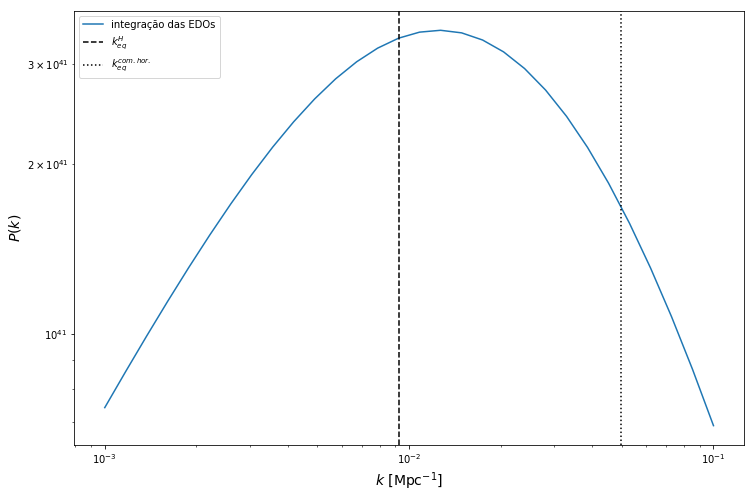

In [11]:
from scipy.integrate import solve_ivp

def Pk_function(k, h, Om0, OR0, a_values=[1.]):
    Pk = np.zeros((len(k), len(a_values)))
    
    a_in = 1e-8
    a_f = 1.
    for i, k_ in enumerate(k):
        y_in = [0., np.sqrt(k_), 0., np.sqrt(k_)]

        solution = solve_ivp(fun=lambda t, y: f(t, y, k_, h, Om0, OR0), 
                             t_span=(a_in, a_f),
                             y0=y_in,
                             method='LSODA',
                             rtol=1e-6,
                             t_eval=a_values)
        delta_m = np.array([solution.y[1,i] for i in range(len(a_values))]) 

        Pk[i] = np.power(G**-1 * delta_m, 2)
    if len(a_values) == 1:
        return Pk.T[0]
    else:
        return Pk

def plot_Pk(h=h, Om0=Om0, OR0=OR0, normalize=False):
    k = np.logspace(-3, -1, 30)
    Pk = Pk_function(k, h, Om0, OR0)
    keq_h = keq_hubble(h, Om0, OR0)
    keq_c = keq_comoving_horizon(h, Om0, OR0)
    
    if normalize:
        Pk = Pk/Pk_function([0.06], h, Om0, OR0)
    fig, ax = plt.subplots(1,1, figsize=(12, 8))
    ax.loglog()
    ax.plot(k, Pk, label=r"integração das EDOs");
    ax.axvline(keq_h, color="k", ls="dashed", label=r"$k_{eq}^{H}$")
    ax.axvline(keq_c, color="k", ls="dotted", label=r"$k_{eq}^{com.hor.}$")
    ax.set_xlabel(r"$k$ [Mpc$^{-1}]$", fontsize=14)
    ax.set_ylabel(r"$P(k)$", fontsize=14)
    ax.legend();
    return ax;
    
plot_Pk()

## Comparação com Class, BBKS e 2dF

In [7]:
from classy import Class

ks = np.logspace(-3, -1, 20)
Omega_b0 = 0.005  #menor valor permitido pelo Class

params = {
        'output': 'mPk',
        'z_pk': 0,
        'Omega_b': Omega_b0,
        'Omega_g': OR0,
        'Omega_ur': 0,
        'h': h,
        'n_s': 1.,
        'sigma8': 1.0,
        'Omega_cdm': Om0 - Omega_b0,
        'YHe': 0.2,
        'gauge': 'newtonian',
        }
cosmo = Class()
cosmo.set(params)
cosmo.compute()

pks_class = np.array([cosmo.pk_lin(k, 0) for k in ks])

from scipy.interpolate import interp1d

interp_class = interp1d(ks, pks_class)

In [8]:
def bbks(k, h, Om0, OR0, Ob0=0):
    k_eq = 0.073 * h**2 * Om0
    x = k/k_eq
    if Ob0 > 0:
        x *= np.exp(2*Ob0)
    Tx = np.log(1 + 0.171*x) / (0.171*x) * np.power( 1 + 
                                                    0.284*x + 
                                                    (1.18*x)**2 + 
                                                    (0.399*x)**3 + 
                                                    (0.490*x)**4, -1./4)
    return k * (Tx**2)

In [9]:
k, Pk, Pkerr = np.loadtxt("LSS2df.dat", unpack=True)
interp2df = interp1d(k, Pk)
interp2dferr = interp1d(k, Pkerr/Pk)

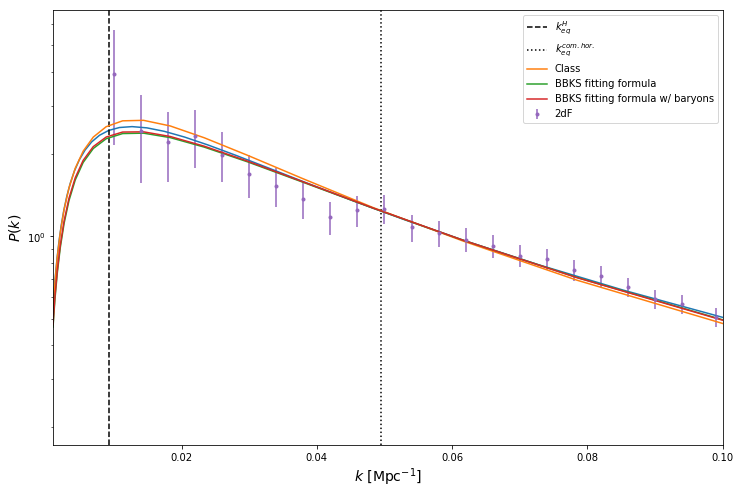

In [10]:
ax = plot_Pk(normalize=True)
ax.set_xlim((0.08, 0.10))
ax.plot(ks, pks_class/interp_class(0.06), label="Class")
ax.plot(ks, bbks(ks, h, Om0, OR0)/bbks(0.06, h, Om0, OR0), label="BBKS fitting formula")
ax.plot(ks, bbks(ks, h, Om0, OR0, Omega_b0)/bbks(0.06, h, Om0, OR0, Omega_b0), label="BBKS fitting formula w/ baryons")
ax.errorbar(k, Pk/interp2df(0.06), interp2dferr(k)*Pk/interp2df(0.06), label="2dF", fmt='.')

ax.set_xlim((0.001, 0.1))
ax.set_xscale("linear")
ax.legend()

## Comportamento quando $\Omega_{R0} \rightarrow 0$

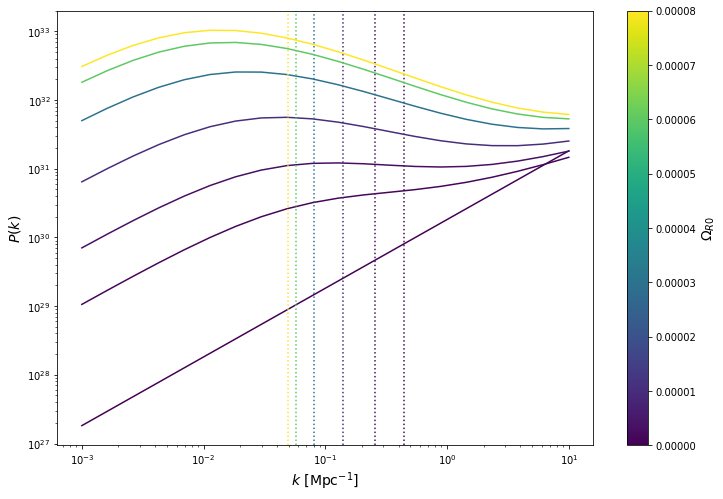

In [6]:
import matplotlib.pyplot as plt
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=0., vmax=OR0))
sm._A = []

k = np.logspace(-3, 1, 20)
ORs = [0., 1e-6, 3e-6, 1e-5, 3e-5, 6e-5, 8e-5]
Pks = [Pk_function(k, h, Om0, OR) for OR in ORs]

fig, ax = plt.subplots(1,1, figsize=(12, 8))

cb = fig.colorbar(sm)
cb.set_label(r"$\Omega_{R0}$", fontsize=14)
ax.loglog()
for OR, Pk in zip(ORs, Pks):
    try:
        keq_c = keq_comoving_horizon(h, Om0, OR)
        ax.axvline(keq_c, color=sm.to_rgba(OR), ls="dotted", label=r"$k_{eq}^{com.hor.}$")
    except ZeroDivisionError:
        pass
    ax.plot(k, Pk, c=sm.to_rgba(OR))

ax.set_xlabel(r"$k$ [Mpc$^{-1}]$", fontsize=14)
ax.set_ylabel(r"$P(k)$", fontsize=14);

Vemos que quando $\Omega_{R0}$ se aproxima de 0, a era da radiação dura cada vez menos tempo, por isso o horizonte comóvel cresce menos nesta época, e "engole" menos modos. Isso faz com que menos modos tenham seu crescimento congelado durante a era da radiação (modos com $k > k_{eq}^{hor.com.}$), por isso o pico se move para a direita, e o espectro de potência se aproxima cada vez mais da sua forma primordial invariante de escala.

Por outro lado, quanto maior a densidade de radiação maior é a função de Hubble em tempos remotos, o que faz com que os modos não amortecidos (k pequeno) crescam mais vigorosamente; daí a reta assintótica para k pequeno ficar cada vez mais alta.

## Comportamento como função do fator de escala

In [18]:
a_dec = 1./(1 + 1090)
k = np.logspace(-3, 1, 30)
a_values = np.logspace(-8, 0, 20) 
keq_h = keq_hubble(h, Om0, OR0)
keq_c = keq_comoving_horizon(h, Om0, OR0)

plt.ioff()

#Pk = Pk_function(k, h, Om0, OR0, a_values=a_values)
#Pknorm = Pk_function(np.array([1e-5]), h, Om0, OR0, a_values)
#Pk = Pk/Pknorm

for i, a in enumerate(a_values):
    Ha = H_function(a, h, Om0, OR0) 
    Hdec = H_function(a_dec, h, Om0, OR0) 
    k_jeans = 2*pi/3. * Ha * a
    k_dec = 2*pi/3. * Hdec * a_dec
    
    fig, ax = plt.subplots(1,1, figsize=(12, 8))
    ax.loglog()
    ax.set_title("a = {:.1e}".format(a))
    ax.plot(k, Pk[:,i]);
    ax.axvline(2*pi/3. * keq_h, color="k", ls="dashed", label=r"$k_J(a_{eq})$")
    ax.axvline(k_dec, color="k", ls="dotted", label=r"$k_J(a_{dec})$")
    ax.axvline(k_jeans, color="b", ls="-.", label=r"$k_J(a)$")
    ax.set_xlabel(r"$k$ [Mpc$^{-1}]$", fontsize=14)
    ax.set_ylabel(r"$P(k)$ [u.a]", fontsize=14)
    ax.plot(k, k/1e-5)
    ax.set_xlim((1e-3, 1e1))
    ax.set_ylim((1e1, 1e6))
    ax.legend();
    fig.savefig("pk_{:02d}.png".format(i))
    plt.close()


In [19]:
!convert -loop 0 -delay 50 pk_*.png pk.gif

![gif](pk.gif)